In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
def rotate_img(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = img
    gray = cv2.bitwise_not(gray)
    
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    print(angle)
    
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    print(angle)
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return rotated

In [3]:
def adaptive_thresholding(noisy_img):
    noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)
    adaptive_th=cv2.adaptiveThreshold(noisy_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,10)
    # 2nd parameter - maximum value of threshold 255 (white) 
    # 3rd parameter - Adaptive method - Either Gaussian or Mean ( Gaussian is preferable as it takes weieghted sum of neighbouring pixels)
    # 4th paramter - Threshold ttype - Binary (black and white)
    # 5th parameter - kernel size ( here 15*15 )
    # 6th parameter - constant value that needs to be subtracted (trial and errror method try for different values)
    return (adaptive_th)

-23.010513305664062
23.010513305664062


True

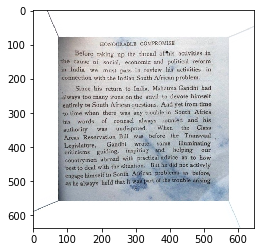

In [4]:
dirty_img = cv2.imread('./image/aug/aug_12-shakkthi_7.jpeg')
rotated =  rotate_img(dirty_img)
plt.imshow(rotated)
plt.plot()
result = adaptive_thresholding(rotated)
cv2.imwrite('./adaptivethreshold-clean.jpeg',result)

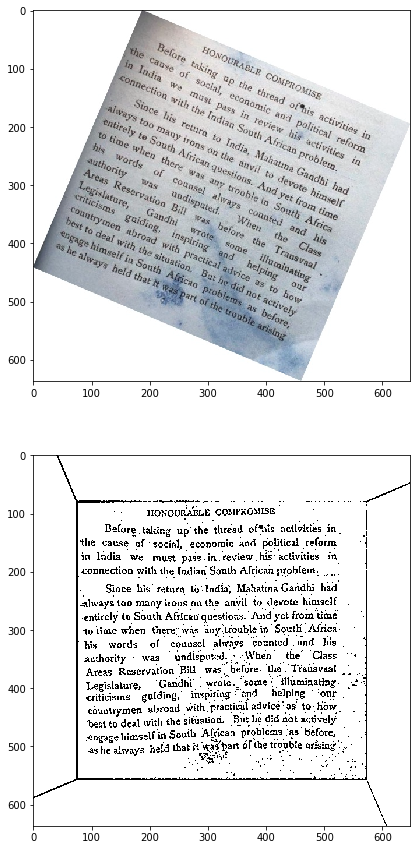

In [5]:
plt.rcParams["axes.grid"] = False
fig, axarr= plt.subplots(2,1, figsize=(15,15))
axarr[0].imshow(dirty_img, cmap='gray')
axarr[1].imshow(result, cmap='gray')